<span style="color:green">**Поздравляю, твой проект принят!**</span>

Артемий, отличная работа, получился качественный аналитический отчет. Поставленные задачи были успешно выполнены! Спасибо за обозначение корректировок. Недочёты исправлены! Надеюсь, ревью было полезным:) Желаю успехов в учебе и следующих проектах!

Актуальные комментарии и рекомендации имеют метку `v2`.

<span style="color:purple">**Привет, Артемий!**</span>

Меня зовут **Василий** и я – ревьювер, буду проверять твой проект. Ты проделал большую работу над проектом, но давай сделаем его еще лучше.

Спасибо, что прислал проект. В тетради ты сможешь найти мои комментарии. Пострайся учесть эти комментарии в ходе выполнения дальнейших проектов.

Твой проект обладает хорошей структурой и понятной логикой исследования.

Обрати внимание, я буду выделять свои комментарии цветом, в зависимости от того, какие действия, важность и особенности тебя ждут в процессе проверки.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Такими комментариями я буду помечать хорошо проделаную работу, а так же хорошо проделаную работу над ошибками.
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
После таких комментариев ничего исправлять не нужно, но я дам рекомендации на будущее и подскажу, что можно улучшить.
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Если ты видишь такой комментарий, значит я указываю тебе на недочёт, его нужно исправить. Без такого исправления я не приму твою работу:)
</div>

**Пожалуста, не удаляй мои комментарии. При повторной проверке, я буду ориентироваться на них.**

<span style="color:blue"> Можешь под моими комментариями оставлять свои, в которых опиши свои исправления. Это облегчит процесс проверки и мне, и тебе:) Например, вот так:</span>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b>
</div>

# Анализ гипотез и A/B-тестирование для увеличения выручки интернет-магазина

Данное исследование посвящено приоритизации и проверке гипотез, направленных на увеличение выручки интернет-магазина. В рамках работы будет проведена совместная работа с отделом маркетинга, результатом которой станет перечень гипотез, каждая из которых может потенциально способствовать росту доходов. После приоритизации гипотез с использованием различных методик будет проведен A/B-тестирование наиболее перспективных идей. Цель исследования — определить, какие из предложенных изменений действительно приводят к положительным изменениям в поведении пользователей и увеличению выручки, и, соответственно, могут быть внедрены на постоянной основе. В рамках исследования мы будем работать с двумя датасетами. 

Для приоритизации гипотез мы будем использовать датасет /datasets/hypothesis.csv

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

Для проведения A/B-тестирования мы будем исаользовать два датасета /datasets/orders.csv и /datasets/visitors.csv.

Файл `/datasets/orders.csv`

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Понятно чему посвящена твоя работа👍
</div>

Перед началом исселовадния импортируем все нужные нам библиотеки и создадим нежные функции.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Правильно, что импортируешь необходимые библиотеки в первой ячейке. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет настроить свое окружение при необходимости.
</div>

In [2]:
def primary_analysis(df):

    print("Информация о датафрейме:")
    print(df.info())
    
    print("\nПервые 5 строк датафрейма:")
    print(df.head())
    
    print("\nОписание численных столбцов:")
    print(df.describe())
    
    print("\nКоличество явных дубликатов в датасете:")
    print(df.duplicated().sum())
    
    print("\nЧастота распределений для категориальных столбцов:")
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\nСтолбец '{column}':")
        print(df[column].value_counts())

## Приоритизация гипотез

В файле hypothesis.csv содержится 9 гипотез, направленных на увеличение выручки интернет-магазина. Каждая гипотеза сопровождается оценкой таких параметров, как Reach (охват), Impact (влияние), Confidence (уверенность) и Effort (затраты). Сначала взглянем на структуру предложенных данных:

In [3]:
pd.set_option('display.max_colwidth', None)
data_hyp = pd.read_csv('/datasets/hypothesis.csv')
primary_analysis(data_hyp)

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Первые 5 строк датафрейма:
                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что у

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Молодец, что изменяешь параметры отображения таблиц для вывода всей информации👍
</div>

In [4]:
data_hyp.columns = [x.lower() for x in data_hyp.columns]

Данные корректны, дубли отсутствуют, и форматирование соответствует требованиям. Гипотезы сформулированы верно, и на первый взгляд, градация параметров представляется обоснованной. Мы можем переходить к приоритизации предложенных гипотез.

Для начал применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [5]:
data_hyp['ICE'] = (data_hyp['impact'] * data_hyp['confidence'])/data_hyp['efforts'] 
sorted_data_hyp_ice = data_hyp[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
sorted_data_hyp_ice['ICE'] = sorted_data_hyp_ice['ICE'].round(3)
display(sorted_data_hyp_ice)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Рекомендую производить округление до 3 знаков после запятой.
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Сделано
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
👍
</div>

Если следовать фреймворку ICE, то в первую очередь следует рассмотреть гипотезу о запуске акции, предусматривающей предоставление скидки на товар в день рождения клиента. На втором месте находится гипотеза о том, что добавление двух новых каналов для привлечения трафика может увеличить количество пользователей на 30%. Третьей по значимости гипотезой является внедрение формы подписки на всех ключевых страницах для формирования базы клиентов для email-рассылок. На последнем месте по приоритетности расположена гипотеза, предполагающая изменение цвета фона главной страницы с целью повышения вовлеченности пользователей.

Попробуем применить фреймворк RICE и взглянем, как изменилась приоритизация.

In [6]:
data_hyp['RICE'] = (data_hyp['reach'] * data_hyp['impact'] * data_hyp['confidence'])/data_hyp['efforts'] 
sorted_data_hyp_rice = data_hyp[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
sorted_data_hyp_rice['RICE'] = sorted_data_hyp_rice['RICE'].round(3)
display(sorted_data_hyp_rice)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Ситуация несколько изменилась, однако гипотезы под номерами 7 и 2 остаются в числе лидеров. Гипотеза о добавлении формы подписки на все ключевые страницы, направленная на создание базы клиентов для email-рассылок, вышла на первое место с явным преимуществом. Это объясняется тем, что параметр reach для данной гипотезы, определяющий охват пользователей, достигает максимального значения - 10. На второе место переместилась гипотеза о добавлении блоков рекомендаций товаров на сайте интернет-магазина для повышения конверсии и среднего чека заказа, также имеющая высокое значение охвата - 10. Гипотеза о добавлении двух новых каналов для привлечения трафика, что позволит увеличить количество пользователей на 30%, сместилась с второго на третье место. Предыдущий лидер - гипотеза о запуске акции с предоставлением скидки на товар в день рождения - опустилась в середину списка из-за минимального охвата, равного 1. На последнем месте осталась гипотеза об изменении цвета фона главной страницы для повышения вовлеченности пользователей.

Изменение приоритизации гипотез при применении RICE вместо ICE произошло в основном из-за акцента на Reach в RICE. Этот параметр отражает количество пользователей, которые будут затронуты изменением, и значительно влияет на приоритет гипотез. Это хорошо видно на примере - гипотеза 8, имея довольно высокие параметры confidence и impact и имея средний уровень efforts, выбилась на первую строчку в списке по фреймворку ICE, однако переводя этот список в фреймворк RICE, ситуация для этой гипотезы меняется и она отправляется в середину списка, так как ее параметр reach всего один по сравнению с гипотезой 7, чей параметр reach является максмальным - 10. Так или иначе стоит обратить внимание на 2 гипотезы, которые остались в топ-3 сразу в двух фреймворках:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Все верно, охват меняет приоритезацию. Отличие фреймворков определено.
</div>

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv. Сначала взглянем на структуру предложенных данных:

In [7]:
visitors = pd.read_csv('/datasets/visitors.csv')
primary_analysis(visitors)

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Первые 5 строк датафрейма:
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756

Описание численных столбцов:
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000

Количество явных дубликатов в датасете:
0

Частота распределений для категориальных столбцов:

Столбец 'date':
2019-08-06    2
2019-08-25    2
2019-08-27    2
2019-08-22    2
2019-08-19    2
2019-08-24    2
2019-08-05    2
2019

В датафрейме отсутствуют дубликаты и пропущенные значения. Среднее и медианное значения находятся относительно близко друг к другу, что свидетельствует об отсутствии значительных выбросов в данных. Распределение трафика между группами теста представляется корректным. Однако формат столбца date, представленный как object, может привести к потенциальным проблемам в обработке данных. Для обеспечения корректной работы с датами столбец следует преобразовать в тип datetime64.

In [8]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Даты приведены к соответствующему типу👍
</div>

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
primary_analysis(orders)

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Первые 5 строк датафрейма:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

Описание численных столбцов:
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155621e+09

Также как и в предыдущем датафрейме в этом отсутствуют дубликаты и пропущенные значения, однако большая разника медлу медианой (2978) и средним значением (8348) нам говорит о том, что в данных есть серьезные выбросы. Взглянем на эти аномалии позже. Тажке мы можем наблюдать, что пользователи распределяются между сегментами неравномерно, что создает риск получить полностью некорретные результаты анализа A/B-тестирования. Тажке формат столбца date представлен в object. Начнем испрлавения с последнего.

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Проверь, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах. Дело в том, что при АВ тестировании могут быть ошибки при логировании и распределении пользователей по группам.
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Сделано
</div>

Успех! Теперь проверим, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах.

In [11]:
group_counts = orders.groupby('visitorId')['group'].nunique()
multi_group_users = group_counts[group_counts > 1]
display(multi_group_users)
display(multi_group_users.shape[0]) 

visitorId
8300375       2
199603092     2
232979603     2
237748145     2
276558944     2
351125977     2
393266494     2
457167155     2
471551937     2
477780734     2
818047933     2
963407295     2
1230306981    2
1294878855    2
1316129916    2
1333886533    2
1404934699    2
1602967004    2
1614305549    2
1648269707    2
1668030113    2
1738359350    2
1801183820    2
1959144690    2
2038680547    2
2044997962    2
2378935119    2
2458001652    2
2579882178    2
2587333274    2
2600415354    2
2654030115    2
2686716486    2
2712142231    2
2716752286    2
2780786433    2
2927087541    2
2949041841    2
2954449915    2
3062433592    2
3202540741    2
3234906277    2
3656415546    2
3717692402    2
3766097110    2
3803269165    2
3891541246    2
3941795274    2
3951559397    2
3957174400    2
3963646447    2
3972127743    2
3984495233    2
4069496402    2
4120364173    2
4186807279    2
4256040402    2
4266935830    2
Name: group, dtype: int64

58

Мы можем наблюдать, что доли трафика поделены некорректно - 58 пользователей распределены одновременно между двумя группами. Это нам говорит о том, что пользователи распределяются между сегментами неравномерно. Правильно бы было удалить пересекающихся пользователей, но чтобы это сделать правильно, нужно удалить этих пользователей из обоих датасетов, но таблица с визитами уже содержит агрегированные данные эффективно очисить обе таблиц не получится, поэтому пересекающихся пользоваться в тесте оставим, что, к сожалению, может приведести к искажению теста.

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Согласен с аргументацией👍
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Сперва стоит изуить основные показатели, только потом принимать решения по удалению аномалий, если их влияние на эти показатели окажется сильным. 
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Убрал полностью анализ аномалий в этом разделе. Займусь им уже в разделе с расчетом статичтической значиомсти
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
👌
</div>

Построим и посмотрим на график кумулятивной выручки по группам.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [13]:
# cоберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [14]:
# cоберём агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [15]:
# объединим обе таблицы в одну с понятными названиями столбцов
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Кумулятивные данные сформированы👍
</div>

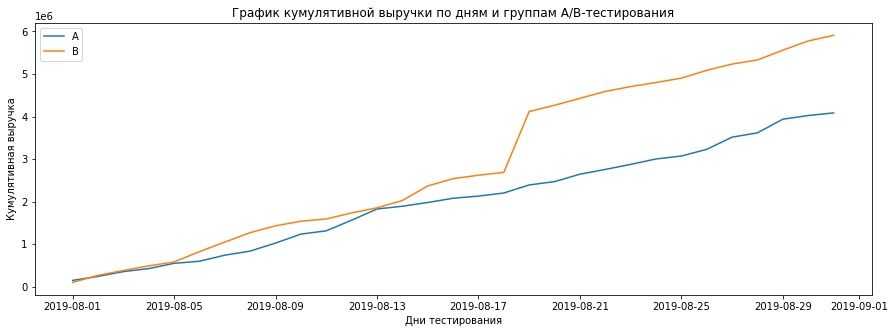

In [16]:
# построим графики кумулятивной выручки по дням и группам A/B-тестирования
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Строим график выручки группы А
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дни тестирования')
plt.ylabel('Кумулятивная выручка')  
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.legend() 
plt.show()

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Стоит заняться оформлением всех графиков в отчете. Нужно добавить подписи осей и названия графиков.

Рекомендую также изучить новые библиотеки визуализации и новые методы в уже изученных.  Прикрепляю несколько интересных ссылок по визуализации:


https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo

https://tproger.ru/translations/python-data-vizualization/
    

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Сделано
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Графики готовы👍
</div>

Выручка равномерно увеличивается на протяжении всего теста. В первую неделю группы A и B демонстрируют схожие результаты, однако затем группа B вырывается вперёд и, после большого скачка, продолжает устойчивый рост. Этот скачок скорее всего вызван большой покупкой - аномалией, с которой мы поработаем позже. Выручка группы A также продолжает расти, но более стабильно без скачков.

Теперь построим и посмотрим на график кумулятивного среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

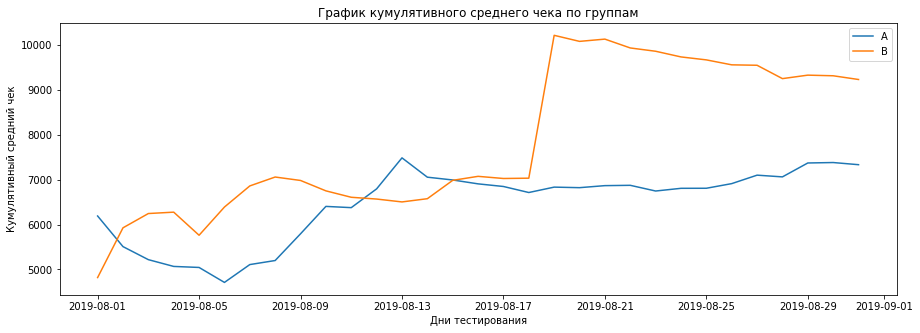

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дни тестирования')
plt.ylabel('Кумулятивный средний чек')  
plt.title('График кумулятивного среднего чека по группам')
plt.legend() 
plt.show()

Кумулятивное значение среднего чека в первой половине теста показывает колебания по сегментам. В группе A за первые дни показатель снижается с 6200 до 4800, тогда как в группе B, наоборот, повышается с 4800 до 6200, что также мы могли наблюдать на первом графике, а позже выскакивает резко наверх, что связанно с аномально большой покупкой. Во второй половине теста значения среднего чека стабилизируются и демонстрируют равномерный рост, причем в группе B этот рост более выраженный, чем в группе A.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

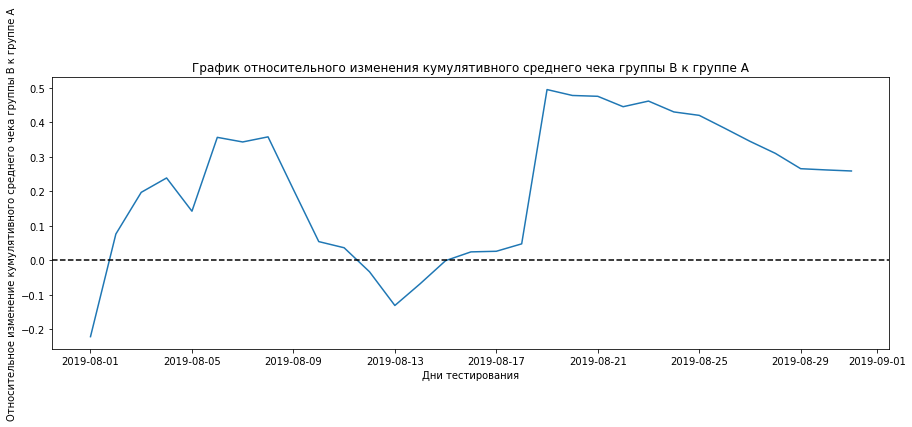

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дни тестирования')
plt.ylabel('Относительное изменение кумулятивного среднего чека группы B к группе A')  
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Как и на предыдущих двух графиках, в первой половине теста наблюдаются значительные колебания, а во второй половине значения относительно стабилизируются.

Построим график кумулятивного среднего количества заказов на посетителя по группам по дням.

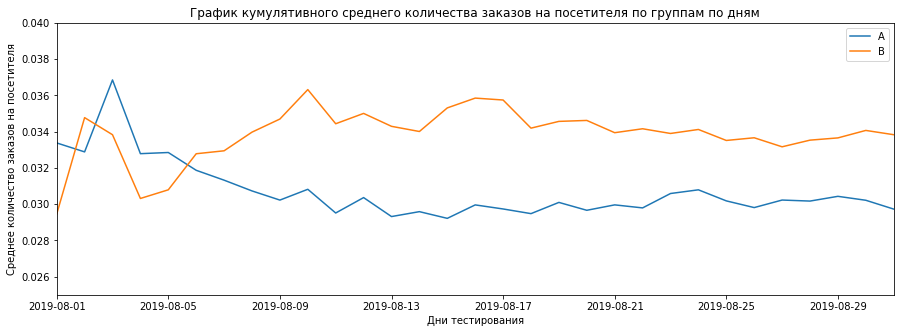

In [19]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
plt.figure(figsize=(15, 5))
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.025,0.04])
plt.xlabel('Дни тестирования')
plt.ylabel('Среднее количество заказов на посетителя')  
plt.title('График кумулятивного среднего количества заказов на посетителя по группам по дням')
plt.legend()
plt.show()

В начале теста значение в обеих группах изменяется нестабильно, с сильными колебаниями. После первого периода колебаний, группа B стабильно опережает группу A и в целом, группа B показывает лучший результат по сравнению с группой A.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен, к середине теста конверсия стабилизировались.
</div>

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

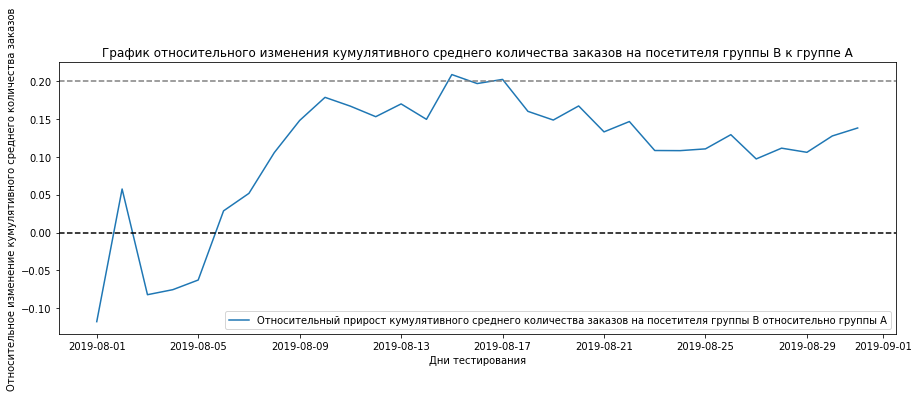

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение среднего количества заказов
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel('Дни тестирования')
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов')  
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.legend()
plt.show()

После колебаний в первую неделю теста группа B лидирует по метрике: становится лучше и лучше, а затем зафиксировалась около прироста в 20% относительно группы A.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Здорово, что даешь комментарии под графиками👍
</div>

Построим точечный график количества заказов по пользователям

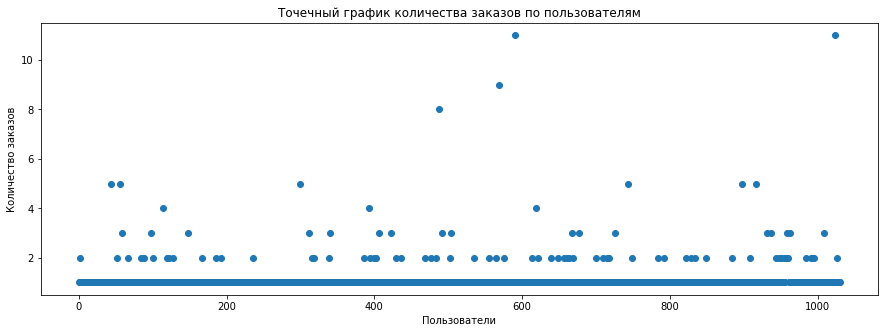

In [21]:
# подсчитаем количество заказов по пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
# построим точечную диаграмму числа заказов на одного пользователя
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')  
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Самое большое количество пользователей имеет от 0 дл 2 заказов. Также много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Встречаются и пользователи с количеством заказов больше 4.

Посчитаем 95-й и 99-й перцентили количества заказов на пользовател и попытаем выбрать границу для определения аномальных пользователей.

In [22]:
display(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

array([1., 2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более 1 раза. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
     
Отлично, перцентили количества заказов на пользователя рассчитаны верно. Согласен с выбранной границей.
</div>

Посчитаем 95-й и 99-й перцентили стоимости заказа и попытаемся выбрать границу для определения аномальных пользователей.

In [23]:
display(np.percentile(orders['revenue'], [90, 95, 99]))

array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Разумно выбрать 28 000 рублей за заказ за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
На этом этапе логично определять аномалии, после изучения основных показателей. Повторную фильтрацию от аномалии проводить не нужно.
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Понял, оставил фильтрацию только тут.
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Принято👌
</div>

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Уровень статистической значимости — это вероятность случайно получить в реальном наблюдении значение, далёкое от предполагаемого в нулевой гипотезе. Метрика у нас количесвенная и встречаются выбросы, поэтому чтобы посчитать статистическую значимость мы используем тест Манна — Уитни. 

- H0 = Среднее количество заказов на посетителя одинаково в обеих группах.
- H1 = Среднее количество заказов на посетителя различается между группами.
- Уровень значимости 𝛼 = 0.05

Перед началом подготовим данные для расчета статистической значимости 

In [24]:
# посчитаем количество пользователей в выбранную дату в группе A

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# посчитаем суммарное число пользователей до выбранной даты включительно в группе A

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# все тоже самое только для группы B

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# посчитаем количество заказов и суммарную выручка в выбранную дату в группе A

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# посчитаем суммарное число заказов и суммарную выручку до выбранной даты включительно в группе A

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# все тоже самое только для группы B

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# соеденим все новых 8 датасетов в один

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Почему ты снова формируешь кумулятивные данные? Перед анализом графиков ты уже собрал их в cumulativeData.

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Сделал так, как было в теории. В cumulativeData у нас нет столбцов visitorsPerDateA и visitorsPerDateB, которые необходимы для расчета sampleA и sampleB
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера v2 (что можно улучшить)**
    
Суть в том, что для sample'ов нужна сумма всех посетителей в день в период тестирования. cumulativeData имеет эти данные, так как сумма посетителей в день равна максимальному значению кумулятивного количества посетителей. То есть, если использовать cumulativeData нужно использовать функцию max, а не sum.

</div>

Создадим переменные, в которых для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

Создадим переменные, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [26]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. Также выведем относительный прирост среднего числа заказов группы B.

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Сформулируй гипотезы и обозначь выбранный уровень статистической значимости.

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Исправил выше
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Гипотезы верно сформулированы👌
</div>

In [27]:
display("p-значение для критерия Манна-Уитни: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) # p-value
display("Относительный прирост среднего числа заказов группы B к группе А: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)) # относительный прирост

'p-значение для критерия Манна-Уитни: 0.017'

'Относительный прирост среднего числа заказов группы B к группе А: 0.138'

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Стоит обозначать, что именно рассчитано – где p-value, а где относительный прирост.
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Исправил
</div>

По «сырым» данным нулевую гипотезу о равенстве в среднем числе заказов можно отвергнуть, так как p-value = 0.017 и оно меньше уровня значимости 0.05. Относительный прирост составляет 13,8%

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
`Относительный прирост составляет 14,5%`
    
По комментарию не очень понятно в пользу какой группы наблюдаются значимые различия.

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Исправил
</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
👍
</div>

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Используем все тот же алгоритм действий.

- H0 = Средний чек одинаков в обеих группах.
- H1 = Средний чек различается между группами.
- Уровень значимости 𝛼 = 0.05

In [28]:
display("p-значение для критерия Манна-Уитни: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display("Относительный прирост среднего чека группы B к группе А: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'p-значение для критерия Манна-Уитни: 0.729'

'Относительный прирост среднего чека группы B к группе А: 0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Хотя, средний чек группы B значительно выше среднего чека группы A - 25,9%.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Ты верно сделал вывод, что статистически значимых различий в среднем чеке нет.
</div>

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Используем все тот же алгоритм действий, однако предварительно исправим данные. 

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 25 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 25 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitorId'], 
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [95]))]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

74

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Здорово, что посчитал аномальных пользователей. Это важно для оценки и контроля данных после фильтрации.
    
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Стоит исключить ручной ввод данных, такой код неустойчив к изменениям исходных данных. Вместо этого лучше использовать перцентили:
    
    int(np.percentile(orders['revenue'], [95])) 
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Спасибо, отличное замечание. Исправил
</div>

Всего 74 аномальных пользователя. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

- H0 = Среднее количество заказов на посетителя одинаково в обеих группах.
- H1 = Среднее количество заказов на посетителя различается между группами.
- Уровень значимости 𝛼 = 0.05

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [31]:
display("p-значение для критерия Манна-Уитни: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display("Относительный прирост среднего числа заказов группы B к группе А: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'p-значение для критерия Манна-Уитни: 0.013'

'Относительный прирост среднего числа заказов группы B к группе А: 0.173'

Результаты по среднему количеству заказов практически не изменились. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

- H0 = Средний чек одинаков в обеих группах.
- H1 = Средний чек различается между группами.
- Уровень значимости 𝛼 = 0.05

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Всё верно, значимые различия по-прежнему есть.
    
</div>

In [32]:
display(
    "p-значение для критерия Манна-Уитни: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "Относительный прирост среднего чека группы B к группе А: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'p-значение для критерия Манна-Уитни: 0.738'

'Относительный прирост среднего чека группы B к группе А: -0.020'

P-значение уменьшилось, но остается значительно выше 0,05. Это означает, что оснований для отклонения нулевой гипотезы и утверждения о наличии различий в среднем чеке по-прежнему нет. Существенное изменение наблюдается в относительном приросте среднего числа заказов группы B: теперь группа B демонстрирует не прирост, а снижение относительно А на 2%.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен с выводом. После очистки значимых отличий по среднему чеку не появилось.
</div>

Из проведенного анализа результатов A/B-тестирования можно утверждать следующее:

- Между группами A и B наблюдается статистически значимое различие по среднему количеству заказов, как на основе исходных данных, так и после фильтрации аномалий. Это указывает на явные различия в эффективности групп.
- По среднему чеку между группами A и B не выявлено статистически значимых различий, как на исходных данных, так и после фильтрации аномалий. Это свидетельствует о том, что средний размер заказа в обеих группах остается схожим.
- Выручка демонстрирует равномерное увеличение на протяжении всего теста. В первой неделе обе группы показывают сопоставимые результаты. Однако затем группа B начинает опережать группу A и, после небольшого скачка, продолжает устойчивый рост. Группа A также продолжает показывать рост выручки, но более стабильно и без резких изменений.
- График различия конверсии между группами показывает, что группа B демонстрирует лучшие результаты по сравнению с группой A. Результаты группы B либо имеют тенденцию к росту, либо стабилизировались на уровне выше среднего значения.
- График различия среднего чека колебался в первой половине теста, но затем стабилизировался на значениях, близких к нулю, что подтверждает отсутствие различий по этому показателю.

Продолжение теста не имеет смысла, поскольку группа B статистически значимо превосходит группу A по ключевым метрикам. График конверсии подтверждает стабильность достигнутого результата. Рекомендуется завершить тест, признать его успешным и перейти к проверке следующей гипотезы.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен с решением. Тест прошел успешно! Среднее количество заказов увеличилось при отсутствии значимых изменений по среднему чеку -> выручка увеличилась, так как стали покупать чаще.
</div>

## Вывод

В ходе проведенного исследования была выполнена приоритизация гипотез с использованием фреймворков ICE и RICE. Анализ проводился на основе данных из файла hypothesis.csv. Эти фреймворки позволили объективно оценить потенциал каждой гипотезы с точки зрения влияния на ключевые метрики бизнеса, таких как выручка, конверсия и рост клиентской базы.

В результате анализа были выделены гипотезы, которые заслуживают наибольшего внимания и приоритетного внедрения, так как обе они попади в топ-3 обоих фреймворков:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Для оценки эффективности предложенных гипотез по увеличению выручки интернет-магазина было проведено A/B-тестирование. Эксперимент основывался на данных из файлов orders.csv и visitors.csv.

- Между группами A и B наблюдается статистически значимое различие по среднему количеству заказов
- По среднему чеку между группами A и B не выявлено статистически значимых различий
- Выручка демонстрирует равномерное увеличение на протяжении всего теста. Группа В опережает группу А после певрой недели теста
- График различия конверсии между группами показывает, что группа B демонстрирует лучшие результаты по сравнению с группой A
- График различия среднего чека колебался в первой половине теста, но затем стабилизировался на значениях, близких к нулю, то есть разница в среднем чеке между этими группами нет

На основании полученных данных можно сделать вывод, что продолжение A/B-теста нецелесообразно, так как группа B статистически значимо превосходит группу A по ключевым метрикам. Результаты теста убедительно показывают, что предложенные изменения, протестированные на группе B, имеют положительное влияние на выручку интернет-магазина.

Рекомендуется завершить тестирование, признать его успешным и перейти к реализации следующей гипотезы из списка приоритетных.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Принимаю общий вывод – все основные результаты работы отражены.
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (общий вывод)**
    
Артемий, мне понравилась твоя работа! Выводы хорошо структурированы и достаточно содержательны, умеешь считать перцентили, собирать и визуализировать данные, качественно анализируешь результаты тестирования, есть навыки проверки гипотез. Спасибо за четкие комментарии по результатам исследования, аккуратный код и качественное оформление отчета! Это упростило проверку. Для принятия твоей работы нужно исправить критические недочёты:
    
* проверить пересечение групп;
* выполнить проект в соответствии с ТЗ – выполнить фильтрацию после анализа показателей АВ теста;
* оформить графики;
* оформить этап проверки гипотез.
    
В дополнении прикрепляю полезные материал по теме A/B-тестирования: 

* https://your-scorpion.ru/ab-tests-check-mathematics/
    
Жду твою работу!
  
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b> Благодарю за конструктивные и понятные комментарии. Все исправил по ним. 
</div>